In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from matplotlib.pyplot import cm
import os, subprocess

In [ ]:
dictionary_convert_to_ua =        {"ALA":"ALA","ARG":"ARG","ASN":"ASN",
                      "ASP":"ASP","CYS":"CYS","GLN":"GLN","GLU":"GLU",
                      "ILE" :"ILE","LEU":"LEU","LYS":"LYS",
                      "MET":"MET","PHE" :"PHE","PRO":"PRO","SER":"SER", 
                      "THR":"THR","TRP" :"TRP","TYR":"TYR","VAL":"VAL",
                      "HSD":"HID","HSE" :"HIE","HSP":"HIP",
                      "CYM":"CYM","ASPP":"AAN","GLUP":"GAN"
                      }



In [3]:
acids=dictionary_convert_to_ua.keys()
mol_print=dictionary_convert_to_ua.values()

In [4]:
ncolor=len(acids)

In [5]:
def plot_pmf(location, ax=None, i=97,  sample=mol_print): 
    ax = ax or plt.gca()
    ncolor=len(sample)
    color = iter(cm.tab20(np.linspace(0, 1, ncolor)))
    
    for n, acid in enumerate(sample):
       
        if acid == 'HIS' :
            acid = 'HIP'  
        c = next(color)  
        pmf=location+acid + '.dat'
        data = genfromtxt(pmf, delimiter=',')
        offset = 0
        data[:,1] -= offset
        minE=np.min(data[:,1])
        if acid == 'HIS':
            aa_label = 'HIP'

        else:
            aa_label = acid
        labelAA=aa_label
        ax.plot( data[:,0], data[:,1], label = labelAA, c=c,  linewidth=1.5,  rasterized=True) # original data from g(r) in kbT already
        ax.plot([1.2,0],[0,0], 'r--', lw=1.5,  rasterized=True)
        ax.set(xlim=(0.0, 2.5), ylim=(-2.0, 4.0), xlabel="SSD (nm)", ylabel=r"$U_{s}$ (k$_{B}$T)",  rasterized=True)



In [6]:
location=os.getcwd()+"/PP/"
my_dpi=300
w_pxl=1200
h_pxl=1000

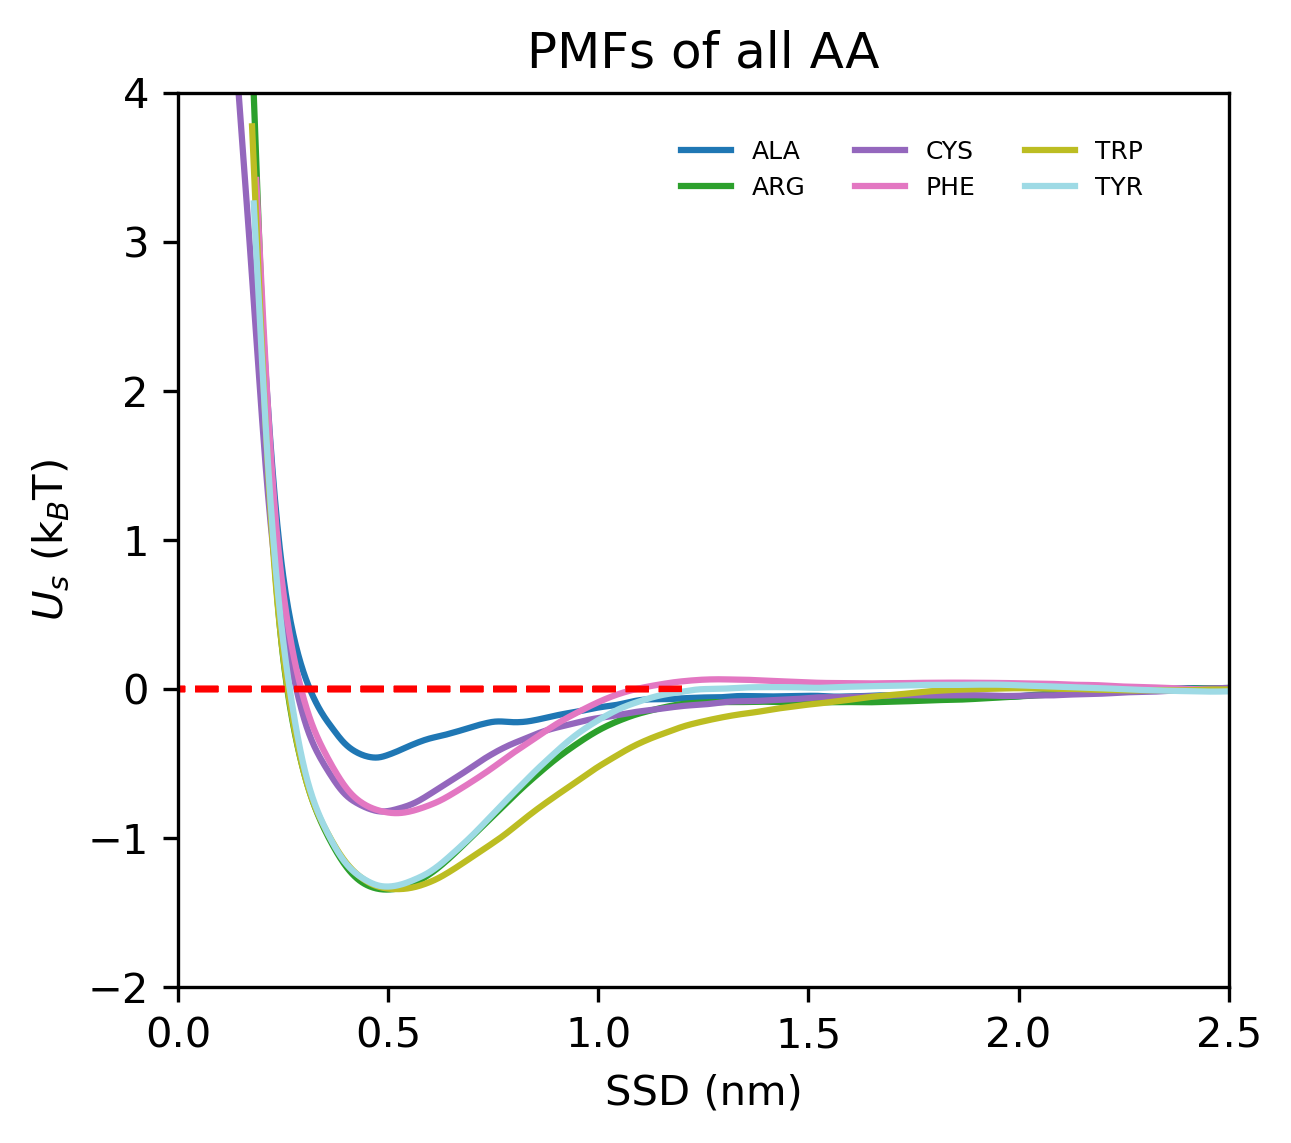

In [7]:
fig, ax1 = plt.subplots(1, 1, figsize=(w_pxl/my_dpi, h_pxl/my_dpi), dpi=my_dpi )
fig.subplots_adjust(left=0.1, right=0.9, wspace=0.3, top=0.9, bottom=0.1)
fig.tight_layout(pad=0.25)

plot_pmf(location, ax1, i=57, sample=mol_print)
labels_handles = {label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())}
plt.title("PMFs of all AA")
fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc="upper center", ncol=3 ,  fontsize=8, frameon=False, #edgecolor='black', title=r"$\bf{SCAs}$"+'\n'
  bbox_to_anchor=(0.70, 0.95),
  bbox_transform=plt.gcf().transFigure, prop={'size': 6}
)

figExt=["eps", "png", "pdf"]
ids=-1
fig.savefig('pmfs.'+figExt[ids], format=figExt[ids], dpi=my_dpi, bbox_inches='tight')